
Thông kê mô tả dữ liệu:
       X-Acceleration  Y-Acceleration  Z-Acceleration   X-Velocity  \
count     1690.000000     1690.000000     1690.000000  1690.000000   
mean        12.819815       13.407432        6.625957     5.054279   
std          7.406752        7.562358        4.150719     7.457963   
min          0.002359        0.000154        0.004475     0.011299   
25%         11.945312       12.142578        4.879883     1.408447   
50%         14.312500       15.480469        6.912109     2.054688   
75%         17.058594       18.203125        9.710938     5.054000   
max         35.281250       33.187500       17.390625    58.625000   

        Y-Velocity   Z-Velocity  Composite-Acceleration  Composite-Velocity  \
count  1690.000000  1690.000000             1690.000000         1690.000000   
mean      5.040527     1.720628               16.114136            7.555773   
std       7.613807     1.236337                9.210682           10.403755   
min       0.018646     0.019

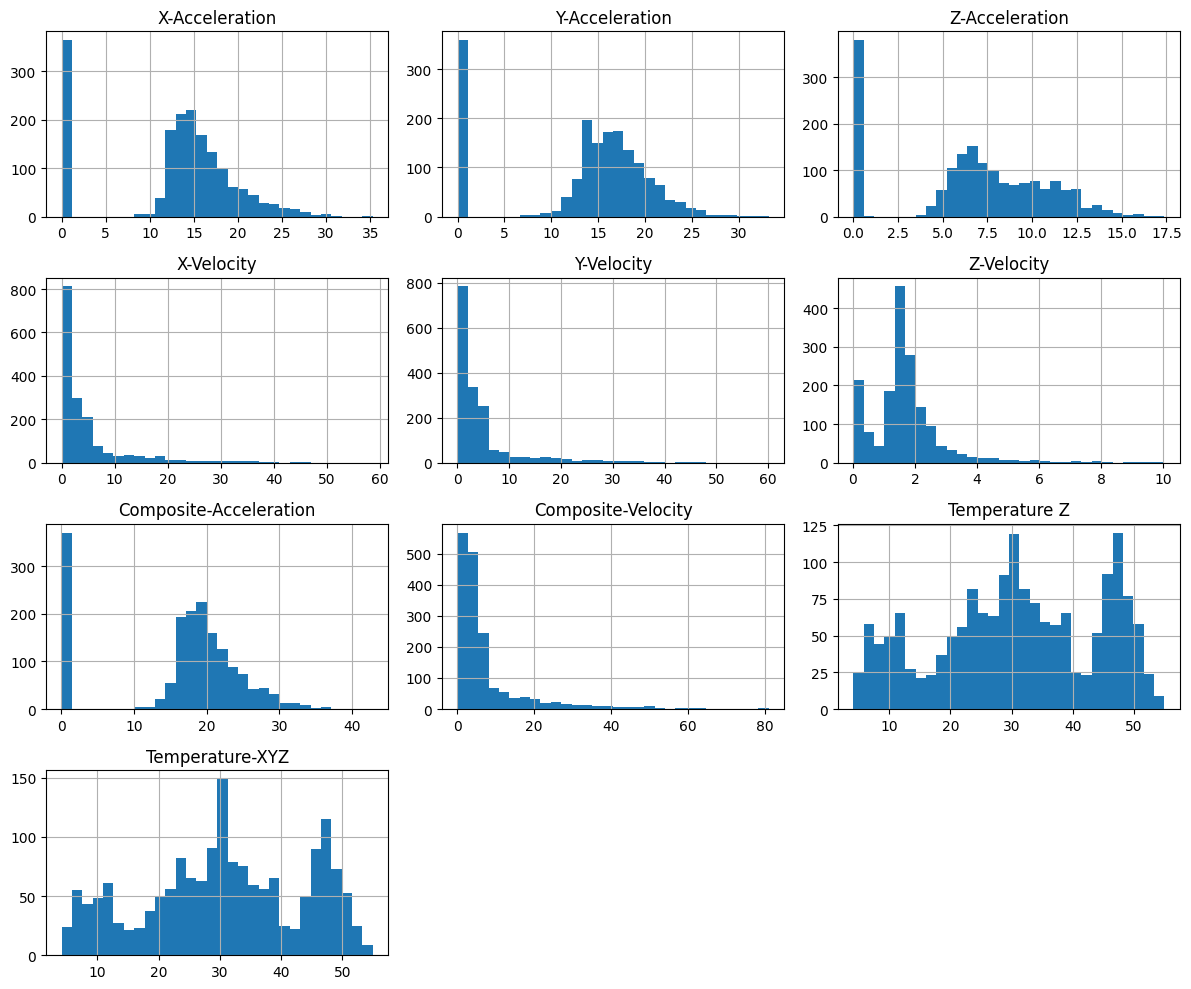

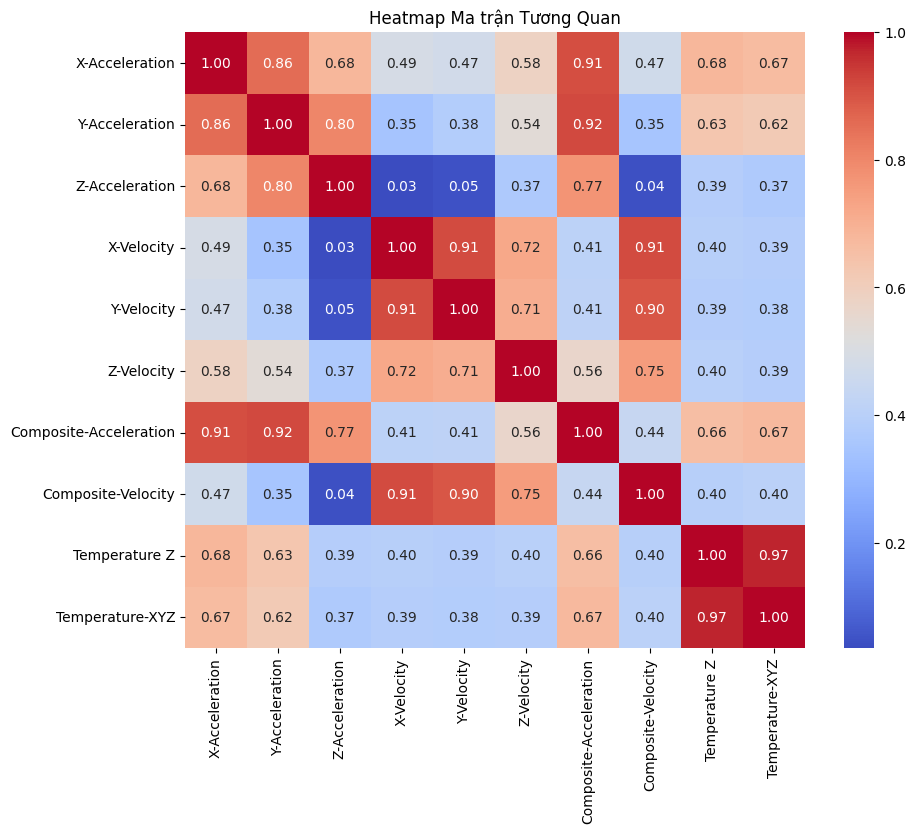


Số lượng giá trị bị thiếu trên từng cột:
Time                      0
X-Acceleration            0
Y-Acceleration            0
Z-Acceleration            0
X-Velocity                0
Y-Velocity                0
Z-Velocity                0
Composite-Acceleration    0
Composite-Velocity        0
Temperature Z             0
Temperature-XYZ           0
dtype: int64

Chạy thuật toán VAE:
Epoch [1/50], Loss: 0.0812
Epoch [2/50], Loss: 0.0437
Epoch [3/50], Loss: 0.0394
Epoch [4/50], Loss: 0.0373
Epoch [5/50], Loss: 0.0358
Epoch [6/50], Loss: 0.0346
Epoch [7/50], Loss: 0.0338
Epoch [8/50], Loss: 0.0335
Epoch [9/50], Loss: 0.0331
Epoch [10/50], Loss: 0.0328
Epoch [11/50], Loss: 0.0326
Epoch [12/50], Loss: 0.0324
Epoch [13/50], Loss: 0.0322
Epoch [14/50], Loss: 0.0322
Epoch [15/50], Loss: 0.0321
Epoch [16/50], Loss: 0.0320
Epoch [17/50], Loss: 0.0320
Epoch [18/50], Loss: 0.0319
Epoch [19/50], Loss: 0.0319
Epoch [20/50], Loss: 0.0318
Epoch [21/50], Loss: 0.0317
Epoch [22/50], Loss: 0.0317
Epoch [2

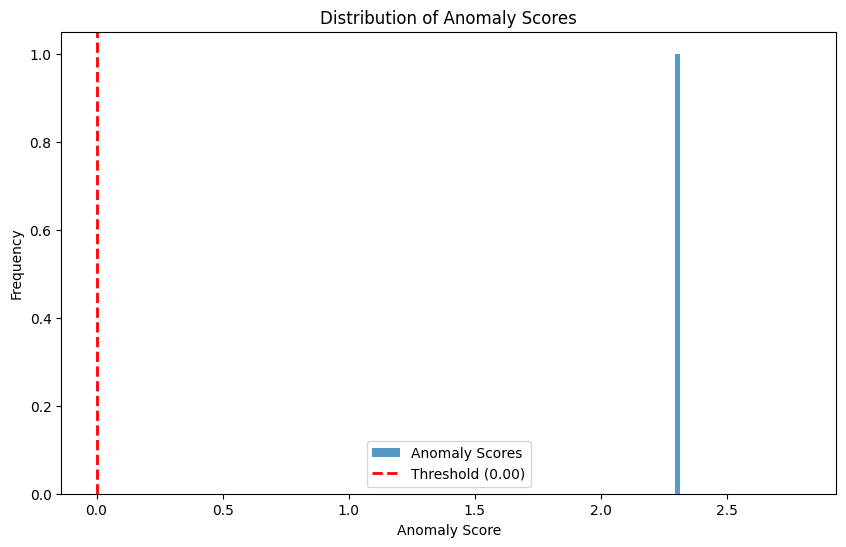

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from models.gan import GAN
from models.isolation_forest import IsolationForestModel
from models.vae import VAEModel

# Bước 1: Đọc dữ liệu
data = pd.read_csv('../../data/Chiller.csv')

# Bước 2: EDA - Phân tích dữ liệu
print("\nThông kê mô tả dữ liệu:")
print(data.describe())

# 2.1. Kiểm tra phân phối dữ liệu
print("\nPhân phối dữ liệu trên từng cột:")
data.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# 2.2. Heatmap - Ma trận tương quan
# Chỉ giữ lại các cột số
numeric_data = data.select_dtypes(include=[np.number])

# Tính ma trận tương quan
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Ma trận Tương Quan")
plt.show()

# 2.3. Kiểm tra dữ liệu bị thiếu
missing_data = data.isnull().sum()
print("\nSố lượng giá trị bị thiếu trên từng cột:")
print(missing_data)

# Bước 3: Chọn các cột đặc trưng (bỏ các cột không cần thiết)
features = data.drop(columns=['Time'], errors='ignore')  # Bỏ cột 'Time' nếu có

# Bước 4: Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Bước 5: Lựa chọn thuật toán
algorithm = "gan"  # Hoặc "vae", "isolation_forest"

if algorithm == "gan":
    print("\nChạy thuật toán GAN:")
    gan = GAN(latent_dim=10, input_dim=scaled_features.shape[1])
    gan.train(scaled_features)
    predictions, anomaly_scores, threshold = gan.predict(scaled_features)

elif algorithm == "vae":
    print("\nChạy thuật toán VAE:")
    vae = VAEModel(input_dim=scaled_features.shape[1])
    vae.train(scaled_features)
    predictions, anomaly_scores, threshold = vae.predict(scaled_features)

elif algorithm == "isolation_forest":
    print("\nChạy thuật toán Isolation Forest:")
    iso_forest = IsolationForestModel(contamination=0.05)
    iso_forest.train(scaled_features)
    predictions, anomaly_scores, threshold = iso_forest.predict(scaled_features)

# In kết quả
print("\nSố lượng điểm bất thường được phát hiện:", np.sum(predictions))

# Kiểm tra giá trị threshold
if isinstance(threshold, np.ndarray):
    threshold = float(threshold[0])  # Lấy giá trị số từ mảng

# Vẽ biểu đồ phân phối anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, alpha=0.75, label='Anomaly Scores')
plt.axvline(
    threshold,
    color='red',
    linestyle='dashed',
    linewidth=2,
    label=f'Threshold ({threshold:.2f})'
)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.show()